In [8]:
import pandas as pd
import numpy as np
import requests 
from bs4 import BeautifulSoup
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partregress_grid
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
#!conda install -y lxml

#df = pd.read_csv('scoreData.csv')
#df["dome"] = 0
#df.loc[df["weather_detail"].str.contains("DOME", na=False), 'dome'] = 1
#df["rain"] = 0
#df.loc[df["weather_detail"].str.contains("Rain", na=False), 'rain'] = 1
#df["fog"] = 0
#df.loc[df["weather_detail"].str.contains("Fog", na=False), 'fog'] = 1
#df["snow"] = 0
#df.loc[df["weather_detail"].str.contains("Snow", na=False), 'snow'] = 1
#df["freezing Rain"] = 0
#df.loc[df["weather_detail"].str.contains("Freezing Rain", na=False), 'freezing Rain'] = 1
#df.drop(columns = ["weather_detail"])


In [2]:
r = requests.get("https://www.pro-football-reference.com/years/1985/games.htm")
root = BeautifulSoup(r.content,"html")
tables = root.find_all(r'table')
df1 = pd.read_html(str(tables[0]))
df1 = df1[0]
df1 = df1.loc[df1['Week'].isin(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'])]
df1.columns = ['Week', 'Day', 'Date', 'Time', 'Winner', 'home', 'Loser', 'rmv', 'PtsW', 'PtsL', 'YdsW', 'TOW', 'YdsL', 'TOL']
df1 = df1.drop(columns = ["rmv"])
df1["year"] = 1985
scores = df1


In [3]:
for i in range(1986, 2020):
    r = requests.get("https://www.pro-football-reference.com/years/" + str(i) + "/games.htm")
    root = BeautifulSoup(r.content,"html")
    tables = root.find_all(r'table')
    df1 = pd.read_html(str(tables[0]))
    df1 = df1[0]
    df1 = df1.loc[df1['Week'].isin(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'])]
    df1.columns = ['Week', 'Day', 'Date', 'Time', 'Winner', 'home', 'Loser', 'rmv', 'PtsW', 'PtsL', 'YdsW', 'TOW', 'YdsL', 'TOL']
    df1 = df1.drop(columns = ["rmv"])
    df1["year"] = i

    scores = scores.append(df1, ignore_index=True)

In [64]:
scores['Location'] = np.where(scores['home'] == '@', scores["Loser"], scores["Winner"])
scores['Location'] = scores.Location.str.rsplit(' ',1).str[0]
scores['PtsW'] = scores['PtsW'].astype(int)
scores['PtsL'] = scores['PtsL'].astype(int)
scores['YdsW'] = scores['YdsW'].astype(int)
scores['TOW'] = scores['TOW'].astype(int)
scores['YdsL'] = scores['YdsL'].astype(int)
scores['TOL'] = scores['TOL'].astype(int)
scores['year'] = scores['year'].astype(int)
scores['PtsT'] = scores['PtsW'] + scores['PtsL']
scores['YdsT'] = scores['YdsW'] + scores['YdsL']
scores['TOT'] = scores['TOW'] + scores['TOL']
scores

,Week,Day,Date,Time,Winner,home,Loser,PtsW,PtsL,YdsW,TOW,YdsL,TOL,year,Location,PtsT,YdsT,TOT
0,1,Sun,September 8,1:00PM,New England Patriots,NaN,Green Bay Packers,26,20,410,5,205,2,1985,New England,46,615,7
1,1,Sun,September 8,1:00PM,Detroit Lions,@,Atlanta Falcons,28,27,286,2,300,1,1985,Atlanta,55,586,3
2,1,Sun,September 8,1:00PM,Chicago Bears,NaN,Tampa Bay Buccaneers,38,28,436,3,307,2,1985,Chicago,66,743,5
3,1,Sun,September 8,1:00PM,Seattle Seahawks,@,Cincinnati Bengals,28,24,297,0,344,1,1985,Cincinnati,52,641,1
4,1,Sun,September 8,1:00PM,Houston Oilers,NaN,Miami Dolphins,26,23,394,4,360,3,1985,Houston,49,754,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8519,17,Sun,December 29,4:25PM,Philadelphia Eagles,@,New York Giants,34,17,400,0,397,2,2019,New York,51,797,2
8520,17,Sun,December 29,4:25PM,Dallas Cowboys,NaN,Washington Redskins,47,16,517,1,271,2,2019,Dallas,63,788,3
8521,17,Sun,December 29,4:25PM,Baltimore Ravens,NaN,Pittsburgh Steelers,28,10,304,2,168,2,2019,Baltimore,38,472,4
8522,17,Sun,December 29,4:25PM,Los Angeles Rams,NaN,Arizona Cardinals,31,24,424,0,393,5,2019,Los Angeles,55,817,5


In [101]:
model1 = statsmodels.formula.api.ols(formula = "YdsT ~ PtsW + PtsL + TOW + TOL", data = scores).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   YdsT   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     1922.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        05:18:43   Log-Likelihood:                -50071.
No. Observations:                8524   AIC:                         1.002e+05
Df Residuals:                    8519   BIC:                         1.002e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    455.1112      3.468    131.217      0.000     448.312     461.910
PtsW           4.1331      0.121     34.202      0.000       3.896       4.370
PtsL           7.2741      0.131     55.439      0.000       7.017       7.531
TOW           -5.5321      0.856     -6.466      0.000      -7.209      -3.855
TOL           -7.1152      0.657    -10.826      0.000      -8.404      -5.827
==============================================================================
Omnibus:                       38.880   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.363
Skew:                           0.136   Prob(JB):                     1.04e-09
Kurtosis:                       3.205   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

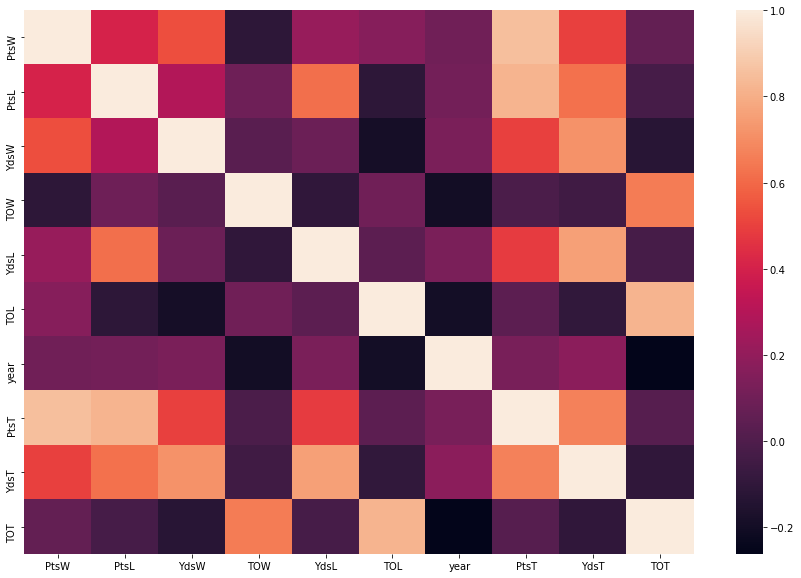

In [66]:
corr = scores.corr(method ='pearson')
plt.figure(figsize=(15, 10))
sns.heatmap(corr)
plt.show()

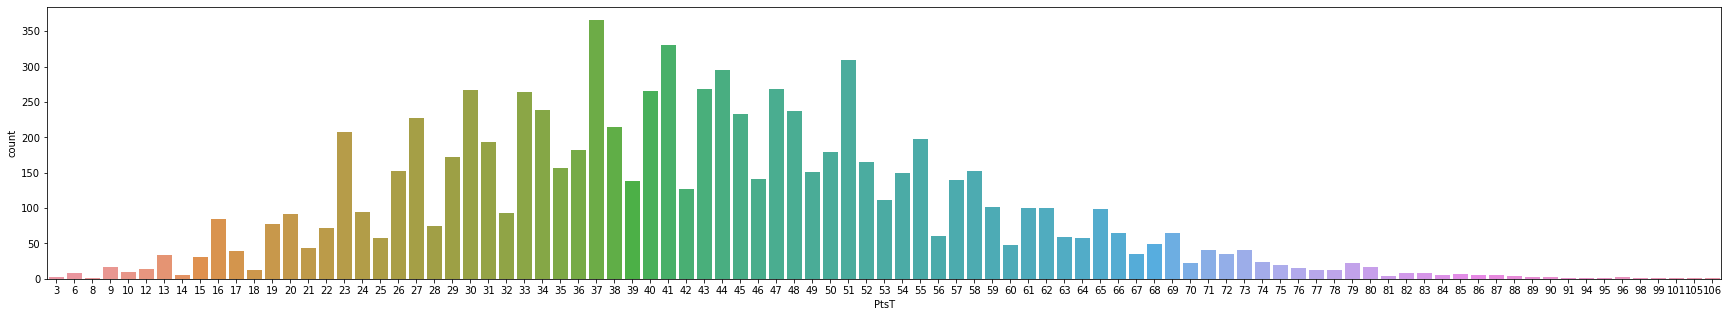

In [79]:
plt.figure(figsize = (30, 5))
score_bar = sns.countplot(x = 'PtsT', data = scores)

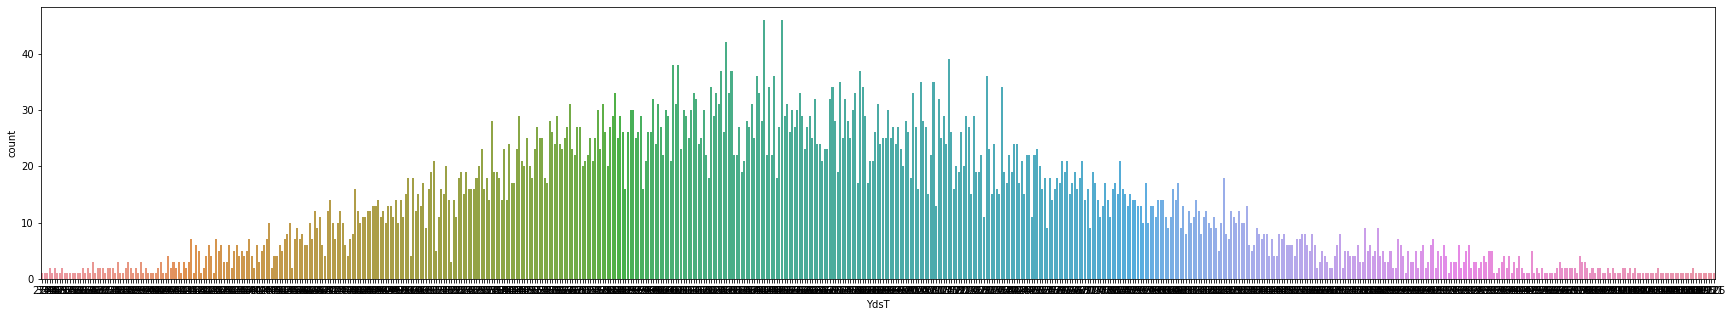

In [81]:
plt.figure(figsize = (30, 5))
yards_bar = sns.countplot(x = 'YdsT', data = scores)

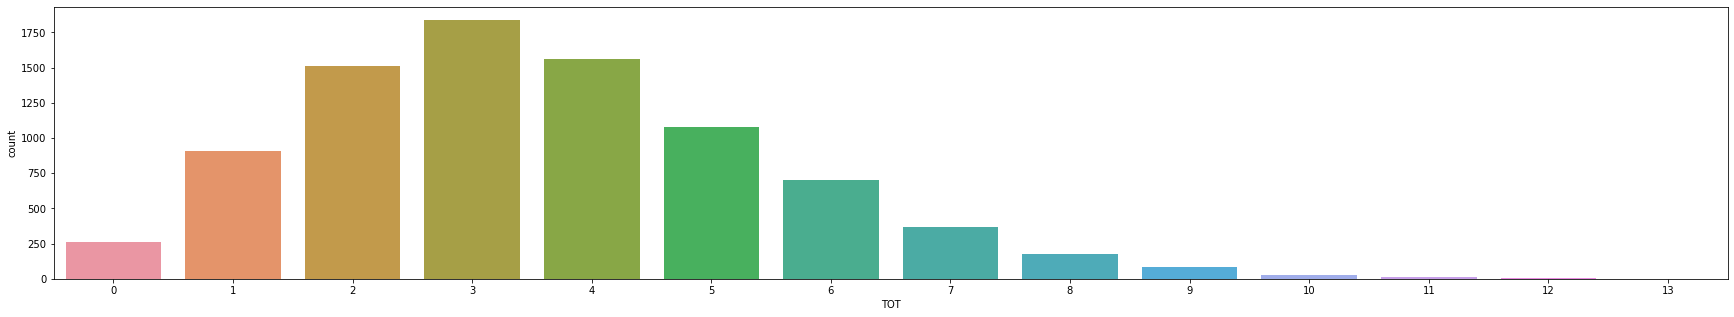

In [102]:
plt.figure(figsize = (30, 5))
yards_bar = sns.countplot(x = 'TOT', data = scores)

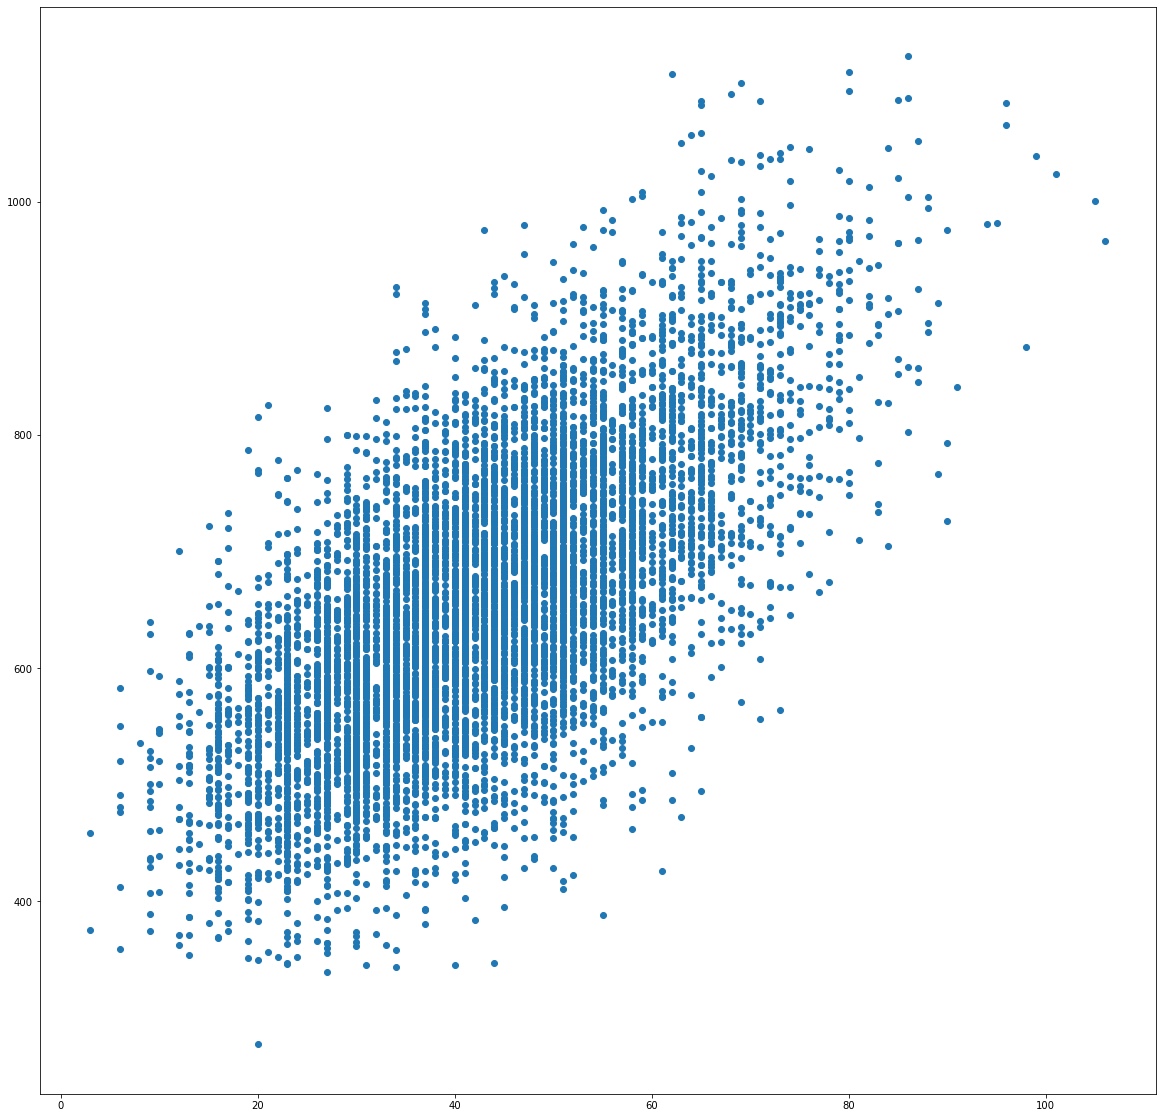

In [88]:
plt.figure(figsize = (20, 20))
plt.scatter(scores['PtsT'], scores['YdsT']);


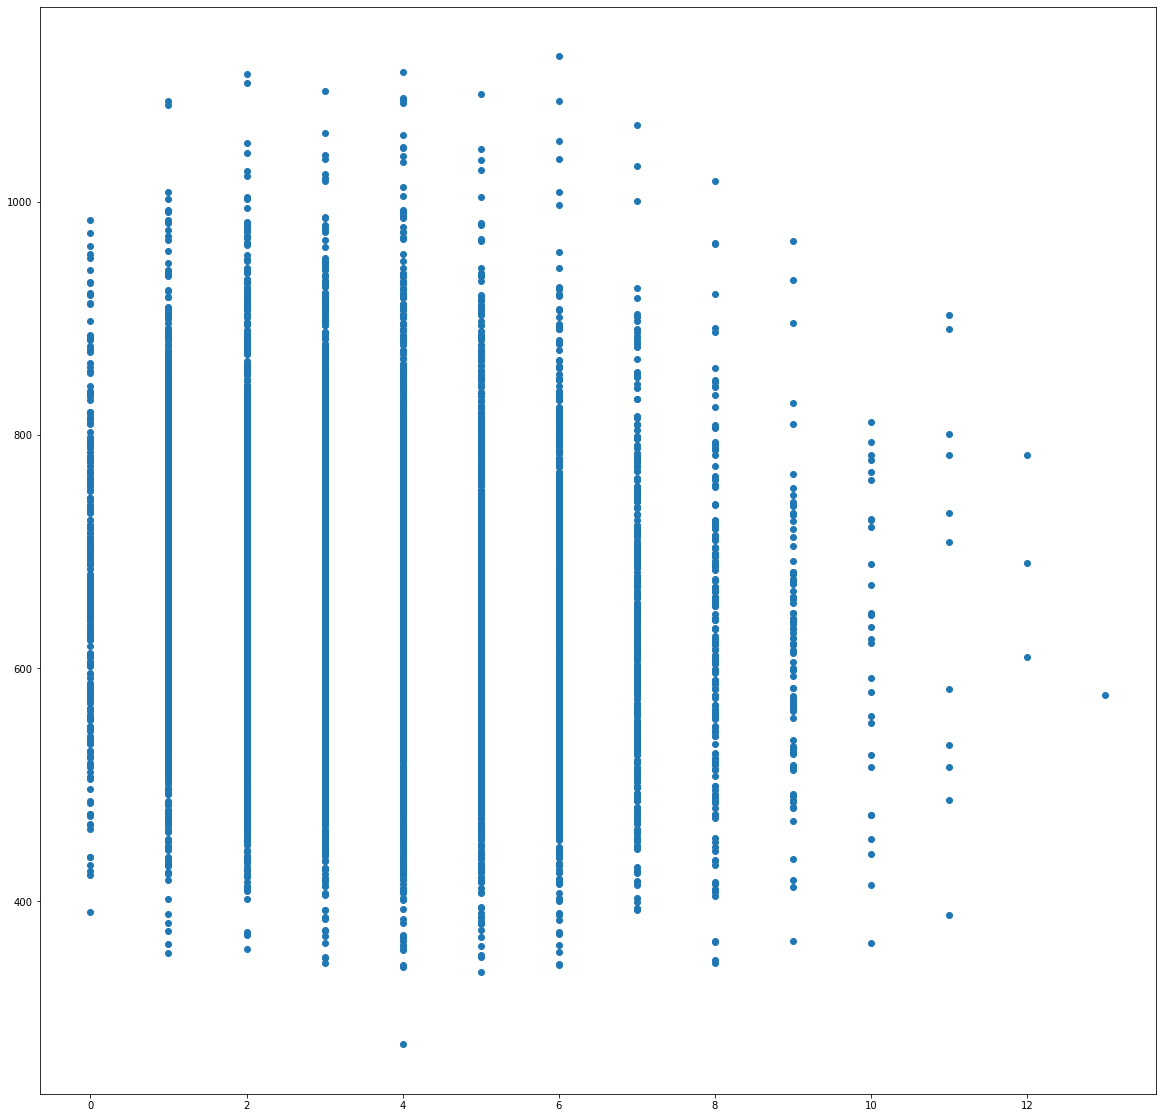

In [91]:
plt.figure(figsize = (20, 20))
plt.scatter(scores['TOT'], scores['YdsT']);

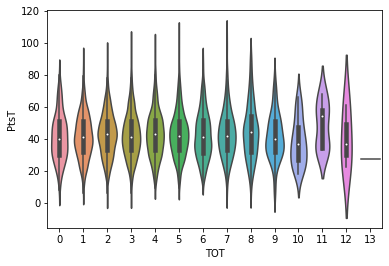

In [97]:
graph = sns.violinplot(x='TOT', y='PtsT', data=scores);


In [36]:
#r = requests.get("http://www.nflweather.com/en/week/2011/week-1/")
#root = BeautifulSoup(r.content,"html")
#tables = root.find_all(r'table')
#df1 = pd.read_html(str(tables[0]))
#df1 = df1[0]
#df1.columns = ['rmv', 'Away', 'rmv', 'rmv', 'rmv', 'Home', 'score', 'rmv', 'rmv', 'weather', 'rmv', 'rmv', 'rmv']
#df1 = df1.drop(columns = ["rmv"])
#df1["Week"] = 1
#df1["Year"] = 2011
#scores = df1
#df1
scores2 = pd.DataFrame()

In [37]:
# for y in range(2011, 2020):
#     for w in range(1, 18):
#         r = requests.get("http://www.nflweather.com/en/week/"  + str(y) + "/week-" + str(w) + "/")
#         root = BeautifulSoup(r.content,"html")
#         tables = root.find_all(r'table')
#         df1 = pd.read_html(str(tables[0]))
#         df1 = df1[0]
#         df1.columns = ['rmv', 'Away', 'rmv', 'rmv', 'rmv', 'Home', 'score', 'rmv', 'rmv', 'weather', 'rmv', 'rmv', 'rmv']
#         df1 = df1.drop(columns = ["rmv"])
#         df1["Week"] = w
#         df1["Year"] = y
#         scores2 = scores2.append(df1, ignore_index=True)
#         backup = scores2.copy()

In [38]:
# backup

In [39]:
# scores2 = backup.copy()
# scores2['scoreTotal'] = scores2.score.str.rsplit(' ').str[1].astype(int) + scores2.score.str.rsplit(' ').str[3].astype(int)
# scores2['score'] = scores2.score.str.partition(' ')[2]
# scores2['temp'] = scores2.weather.str.partition(' ')[0]
# scores2['weather'] = scores2.weather.str.partition(' ')[2]
# scores2['temp'] = scores2.temp.str.partition('/')[0]
# scores2['temp'] = np.where(scores2['temp'] == 'DOME', -1, scores2.temp.str[:-1])
# scores2['temp'] = scores2['temp'].astype(int)
# scores2['temp'] = np.where(scores2['temp'] == -1, np.nan, scores2['temp'])
# scores2['dome'] = np.where(scores2['temp'].isnull(), 1, 0)

# scores2["rain"] = 0
# scores2.loc[scores2["weather"].str.contains("Drizzle", na=False), 'rain'] = 1
# scores2.loc[scores2["weather"].str.contains("Light Rain", na=False), 'rain'] = 1
# scores2.loc[scores2["weather"].str.contains("Lt Rain", na=False), 'rain'] = 1
# scores2.loc[scores2["weather"] == "Heavy Rain", "rain"] = 3
# scores2.loc[scores2["weather"].str.contains("Thunderstorm Rain", na=False), 'rain'] = 3
# scores2.loc[(scores2["weather"].str.contains("Rain", na=False)) & (scores2["rain"] == 0), 'rain'] = 2

# scores2["clouds"] = 0
# scores2.loc[scores2["weather"].str.contains("A Few Clouds", na=False), 'clouds'] = 1
# scores2.loc[scores2["weather"].str.contains("Partly Cloudy", na=False), 'clouds'] = 2
# scores2.loc[scores2["weather"].str.contains("Mostly Cloudy", na=False), 'clouds'] = 3
# scores2.loc[scores2["weather"].str.contains("Overcast", na=False), 'clouds'] = 4

# scores2["fog"] = 0
# scores2.loc[scores2["weather"].str.contains("Fog", na=False), 'fog'] = 1

# scores2["humid"] = 0
# scores2.loc[scores2["weather"].str.contains("Humid", na=False), 'humid'] = 1

# scores2["clear"] = 0
# scores2.loc[scores2["weather"].str.contains("Clear", na=False), 'clear'] = 1
# scores2.loc[scores2["weather"].str.contains("Fair", na=False), 'clear'] = 1

# scores2.loc[(scores2["rain"] == 0) & (scores2["clouds"] == 0) & (scores2["dome"] == 0) & (scores2["clear"] == 0) & (scores2["fog"] == 0) & (scores2["humid"] == 0)]